## Zipf (1935)

Generate a theoretical plot for the 1935 ($ab^2 = k$) formulation of Zipf's law , then compare with actual data from Gratian, first the *dicta*, then the whole *Decretum*. The immediate goal is to write a function corresponding to the one for the 1949 formulation of Zipf's law. The relationship described in the 1935 formulation of Zipf's law is considerably less intuitive than the rank-frequency distribution described in the 1949 version. Where the rank-frequency law starts from the most frequent word and works its way down to less frequent words, the 1935 formulation of Zipf's law starts with hapax words with a single occurrence and works its way up to more frequent words.

### Theoretical

In [1]:
def zipf35(k):
    '''theoretical 1935 Zipf distribution'''
    words = []
    occurrences = []
    a = k
    b = 1
    while a > 1.0:
        a = k / (b ** 2)
        words.append(round(a))
        occurrences.append(b)
        b += 1
    word_occurrence_pairs = list(zip(words, occurrences))
    return word_occurrence_pairs

In [2]:
import math

def logify(data_points):
    x_tmp, y_tmp = zip(*data_points)
    x_values = list(x_tmp)
    y_values = list(y_tmp)
    x_log = [math.log(x) for x in x_values]
    y_log = [math.log(y) for y in y_values]
    return list(zip(x_log, y_log))

In [3]:
import matplotlib.pyplot as pp

def plot_data_scatter(data_points):
    x_values, y_values = zip(*data_points)
    pp.scatter(x_values, y_values)
    pp.xlabel('$log_{e}$ rank')
    pp.ylabel('$log_{e}$ frequency')

In [4]:
import statistics

def regression_slope(data_points):
    n = len(data_points)
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    xy_sum = 0
    x_squared_sum = 0
    for i in range(n):
        xy_sum += x_values[i] * y_values[i]
        x_squared_sum += x_values[i] ** 2
    return (xy_sum - n * x_bar * y_bar) / (x_squared_sum - n * x_bar ** 2)

In [5]:
def plot_regression(data_points):
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    slope = regression_slope(data_points)
    x_values = [0, max(x_values)]
    y_values = []
    for x in x_values:
        y_values.append(y_bar + slope * (x - x_bar))
    pp.plot(x_values, y_values)
    return slope

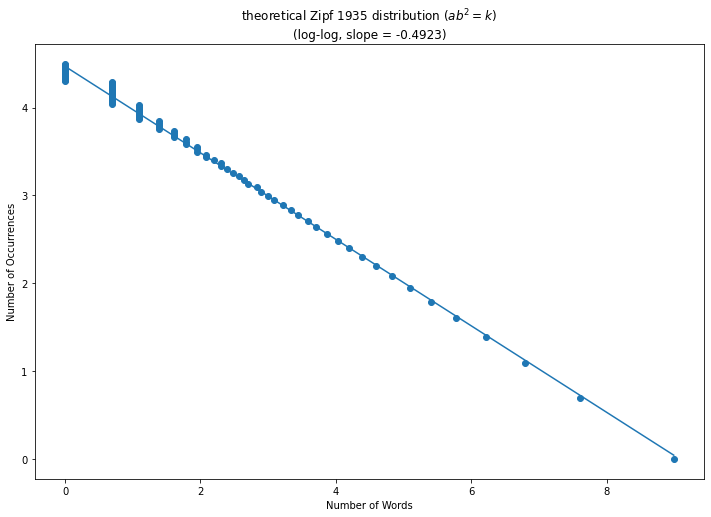

In [6]:
data_points = zipf35(8028)
pp.figure(figsize=(12, 8)) # Jupyter
plot_data_scatter(logify(data_points))
slope = plot_regression(logify(data_points))
pp.xlabel('Number of Words')
pp.ylabel('Number of Occurrences')
pp.title('theoretical Zipf 1935 distribution ($ab^2 = k$)\n(log-log, slope = ' + f'{slope:.4f})')
pp.show()

### Actual

In [7]:
import re

def tokenize(filename):
    '''open text file and return list of tokens'''
    # text = open(filename, 'r').read().lower()
    f = open(filename, 'r') # open file
    text = f.read() # read file
    text = text.lower() # lower-case text
    tokens = [word for word in re.split('\\W', text) if word != ''] # remove punctuation
    return tokens

In [8]:
def get_frequencies(tokens):
    '''create and return token frequency dictionary'''
    types = list(set(tokens))
    tmp = dict.fromkeys(types, 0)
    for token in tokens: tmp[token] += 1
    token_frequencies = {
        key: value for key, value in sorted(tmp.items(),
        key = lambda item: (-item[1], item[0]))
    }
    return token_frequencies

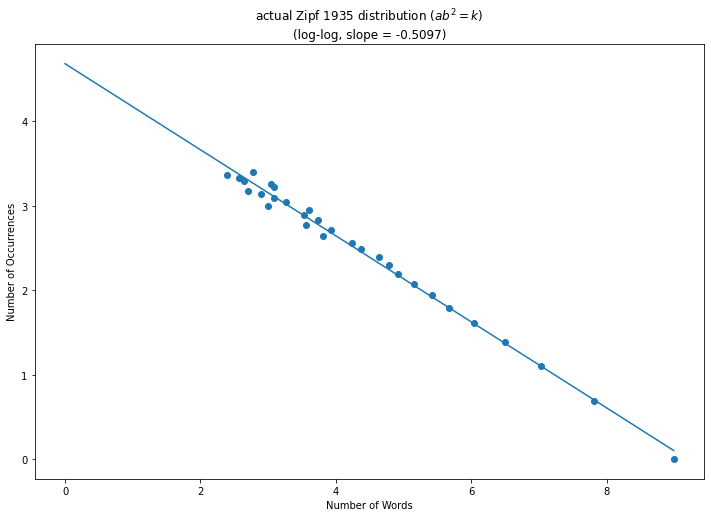

In [10]:
filenames = ['Gratian0.txt', 'Gratian1.txt', 'Gratian2.txt']
tokens = []
for filename in filenames:
    tokens += tokenize(filename)
frequencies = get_frequencies(tokens)
stop = 31 # Figure_Zy
# stop = len(frequencies) # Figure_Zz
words = []
occurrences = []
for b in range(1, stop): # Number of Occurrences (b)
    a = 0 # Number of Words (a)
    for value in list(frequencies.values()):
        if value == b: a += 1
    k = a * b ** 2 # ab^2 = k formulation of Zipf's law
    if a == 0: continue # log(0) throws ValueError: math domain error 
    words.append(a)
    occurrences.append(b)
pp.figure(figsize=(12, 8)) # Jupyter
plot_data_scatter(logify(zip(words, occurrences)))
slope = plot_regression(logify(zip(words, occurrences)))
pp.xlabel('Number of Words')
pp.ylabel('Number of Occurrences')
pp.title('actual Zipf 1935 distribution ($ab^2 = k$)\n(log-log, slope = ' + f'{slope:.4f})')
pp.show()